# Exercise

Dataset: Social media data - https://github.com/abulbasar/data/blob/master/snsdata.csv?raw=true
        
- Use 36 features - "basketball", "football" … "drunk", "drugs" (these columns indicate how many times a user has used these words in her profile) and apply K-Means clustering to group the profiles into 5 clusters
- Find the number of users in each cluster and mean distance with each cluster.
- Which cluster is the most dense in terms of average distance.
- How many anomalies are there?
- For each cluster, find the top 3 dominant features.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *

%matplotlib inline

In [2]:
df = pd.read_csv("https://github.com/abulbasar/data/blob/master/snsdata.csv?raw=true")

In [3]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [4]:
features = df.columns[4:]

In [9]:
X = df[features] * 1.0
a = X.values.flatten()

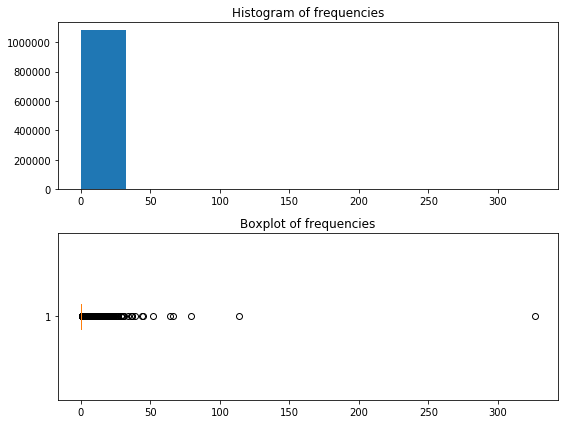

In [10]:
fig, _ = plt.subplots(2, 1, figsize = (8, 6))
axes = fig.axes 

axes[0].hist(X.values.flatten());
axes[0].set_title("Histogram of frequencies")
axes[1].boxplot(a, vert = False);
axes[1].set_title("Boxplot of frequencies")
plt.tight_layout()

In [11]:
X.values.flatten().shape

(1080000,)

In [12]:
a[a>20]

array([ 34.,  22.,  22.,  79.,  44.,  25.,  30.,  27., 114.,  27.,  21.,
        45.,  21.,  23.,  22.,  29.,  22.,  37.,  24.,  26.,  21.,  27.,
        22.,  66.,  26.,  22.,  27.,  64.,  22., 327.,  39.,  21.,  27.,
        22.,  21.,  23.,  23.,  23.,  31.,  24.,  26.,  21.,  27.,  52.,
        30.,  37.,  27.,  36.,  29.,  24.,  23.,  29.])

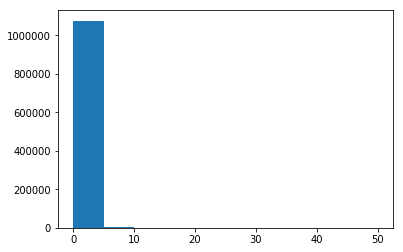

In [13]:
X_clipped = np.clip(X.values, a_min=0, a_max=50)
plt.hist(X_clipped.flatten());

In [14]:
#scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()

X_std = scaler.fit_transform(X_clipped)

In [15]:
%%time 

k = 5
kmeans = cluster.KMeans(n_clusters=k, random_state=1)
kmeans.fit(X_std)

CPU times: user 6.78 s, sys: 35.7 ms, total: 6.82 s
Wall time: 1.2 s


In [16]:
y_pred = kmeans.predict(X_std)

In [17]:
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
centroids.T

,0,1,2,3,4
basketball,2.185926e-01,0.449442,0.436441,0.412173,0.282163
football,2.111973e-01,0.377216,0.549435,0.360555,0.273462
soccer,1.931401e-01,0.367695,0.264124,0.276194,0.249845
softball,1.303934e-01,0.288903,0.238701,0.251541,0.161591
volleyball,1.103398e-01,0.342416,0.211864,0.181818,0.122436
swimming,1.041695e-01,0.267892,0.189266,0.202234,0.162213
cheerleading,3.017104e-02,0.085686,2.888418,0.058937,0.046613
baseball,9.568531e-02,0.119829,0.185028,0.143297,0.106277
tennis,7.817250e-02,0.136901,0.076271,0.108629,0.089497
sports,1.191870e-01,0.175312,0.168079,0.223421,0.210690


In [18]:
centroids.iloc[0, :].T.sort_values(ascending = False)[:10]

music         0.634590
god           0.408648
dance         0.324940
band          0.268908
hair          0.242276
basketball    0.218593
cute          0.213783
football      0.211197
church        0.197178
rock          0.195908
Name: 0, dtype: float64

In [19]:
centroids.iloc[1, :].T.sort_values(ascending = False)[:10]


shopping      1.778070
mall          1.013132
music         0.984570
dance         0.832239
cute          0.800394
hair          0.754760
god           0.561064
church        0.468155
basketball    0.449442
dress         0.387722
Name: 1, dtype: float64

In [20]:
centroids.iloc[2, :].T.sort_values(ascending = False)[:10]

cheerleading    2.888418
music           0.748588
shopping        0.707627
dance           0.668079
hair            0.661017
god             0.608757
cute            0.576271
football        0.549435
basketball      0.436441
mall            0.418079
Name: 2, dtype: float64

In [32]:
centroids.iloc[3, :].T.sort_values(ascending = False)[:10]

clothes       1.355162
music         1.137519
hair          1.065485
dance         0.661017
god           0.610555
cute          0.556626
sex           0.447612
shopping      0.439137
band          0.433359
basketball    0.412173
Name: 3, dtype: float64

In [21]:
centroids.iloc[4, :].T.sort_values(ascending = False)[:10]

drunk     1.428838
hair      1.121193
music     1.026725
sex       0.839030
god       0.743319
dance     0.540087
die       0.467371
band      0.436917
cute      0.424487
kissed    0.420137
Name: 4, dtype: float64

In [22]:
df["cluster"] = y_pred

distances = np.zeros(len(y_pred))
for i in range(k):
    center = kmeans.cluster_centers_[i]
    distances[y_pred == i] = metrics.euclidean_distances(X_std[y_pred == i]
                                                        , center.reshape(1, -1)).squeeze()
df["distance"] = distances
df.sample(10)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster,distance
27927,2009,F,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.043324
25125,2009,F,15.348,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.045408
26725,2009,F,15.622,5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.088296
15606,2008,F,17.002,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.062304
29216,2009,F,15.447,24,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.087788
18235,2008,F,16.882,0,11,0,0,0,4,1,...,0,0,0,0,0,0,0,0,0,0.562576
16307,2008,M,16.323,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.043324
19677,2008,NaN,NaN,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0.074871
26289,2009,F,15.600,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.043324
23162,2009,M,NaN,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.043324


In [23]:
df.groupby("cluster").distance.agg(["mean", "count"])

,mean,count
cluster,,
0,0.127194,22041
1,0.281816,3046
2,0.260301,708
3,0.229620,2596
4,0.225944,1609


In [24]:
df.pivot_table("distance", "cluster", "gender", aggfunc="mean")

gender,F,M
cluster,,
0,0.131036,0.126245
1,0.281103,0.333438
2,0.260543,0.266780
3,0.231254,0.225874
4,0.232222,0.205003


In [25]:
df.pivot_table("distance", "cluster", "gender", aggfunc="count")

gender,F,M
cluster,,
0,15257,4599
1,2777,73
2,642,8
3,2154,265
4,1224,277


In [26]:
df.gender.value_counts()/len(df)

F    0.735133
M    0.174067
Name: gender, dtype: float64

In [27]:
def find_outliers(a):

    q1, q2, q3 = np.percentile(a, [25, 50, 75])
    iqr = q3 - q1
    lower_whisker = max(q1 - 1.5 * iqr, np.min(a))
    upper_whisker = min(q3 + 1.5 * iqr, np.max(a))

    q1, q2, q3, iqr, lower_whisker, upper_whisker

    is_outlier = (a < lower_whisker) | (a > upper_whisker)
    
    return is_outlier

In [28]:
anamolies = df[find_outliers(df.distance)]
anamolies.shape, df.shape

((1543, 42), (30000, 42))

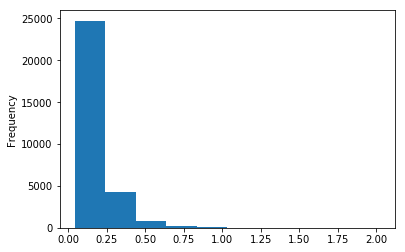

In [29]:
df.distance.plot.hist()

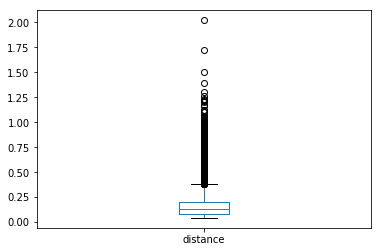

In [30]:
df.distance.plot.box()

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

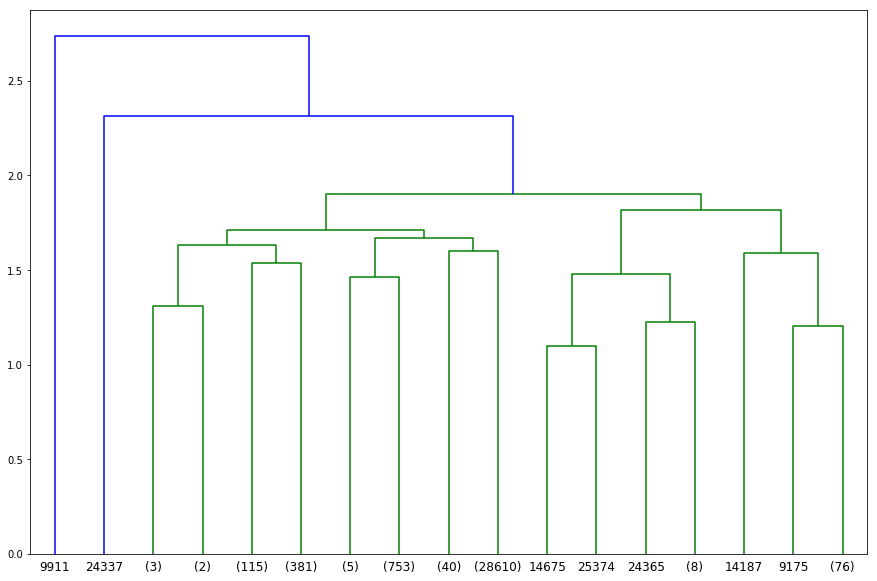

In [34]:
plt.figure(figsize = (15, 10))
row_clusters = linkage(X_std, method="complete", metric="euclidean")
f = dendrogram(row_clusters, p = 5, truncate_mode="level")